In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

## Load the Dataset

In [2]:
df = pd.read_csv('weather_data_extended.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


## Check for Missing Values

In [3]:
df.isnull().sum()

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        2
Wind Speed (kph)    2
Cloud Cover (%)     0
Pressure (mb)       2
UV Index            0
Visibility (km)     0
dtype: int64

## Droping the missing value 

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        0
Wind Speed (kph)    0
Cloud Cover (%)     0
Pressure (mb)       0
UV Index            0
Visibility (km)     0
dtype: int64

## Summary Statistics

In [6]:
df.describe()

,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,16.580730,16.373804,73.513854,16.123300,43.513854,1013.041562,1.746851,10.732997
std,5.574821,7.382814,16.478897,10.338986,34.845115,7.608453,1.092285,1.966105
min,8.300000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000
25%,15.000000,13.800000,67.000000,6.100000,0.000000,1012.000000,1.000000,10.000000
50%,16.000000,16.000000,76.000000,9.000000,50.000000,1013.000000,1.000000,10.000000
75%,24.000000,25.500000,88.000000,24.100000,75.000000,1019.250000,2.000000,10.000000
max,25.000000,27.800000,100.000000,29.900000,75.000000,1024.000000,4.000000,16.000000


## String Indexing(convert text into number)

In [7]:
# String indexing on 'Location' column: Converting Location column from string to integer
df['Location_index'] = df['Location'].astype('category').cat.codes

# Getting unique location names
unique_locations = df['Location'].drop_duplicates().reset_index(drop=True)

# Getting unique location codes
unique_locations_indices = df['Location_index'].drop_duplicates().reset_index(drop=True)

# Create a new DataFrame with both columns
unique_df = pd.DataFrame({
  'Unique_Locations': unique_locations,
  'Unique_Locations_indices': unique_locations_indices
})

unique_df

,Unique_Locations,Unique_Locations_indices
0,New York,3
1,London,2
2,Tokyo,7
3,Paris,4
4,Sydney,6
5,Dubai,0
6,Rome,5
7,Hong Kong,1


## Correlation Heatmap

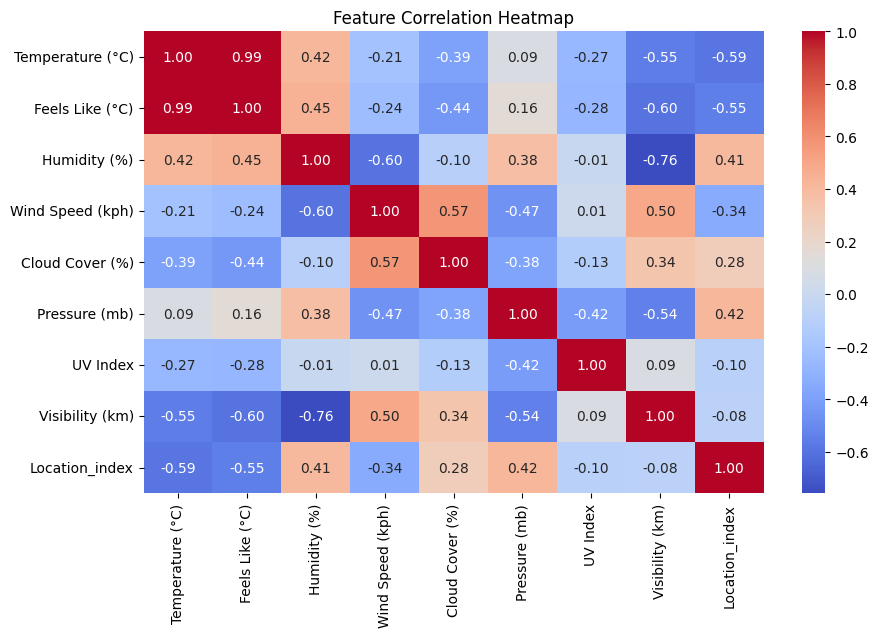

In [8]:
# Select only numeric columns before correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## Box Plot: Humidity

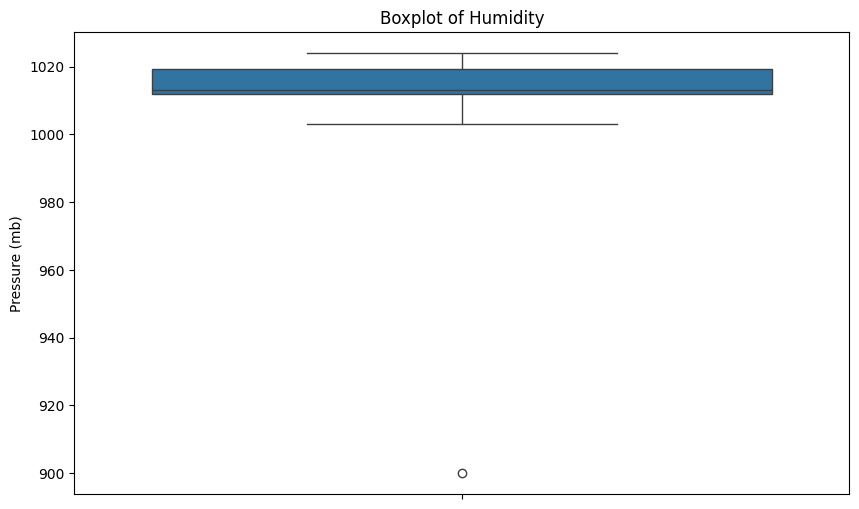

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Pressure (mb)'])
plt.title('Boxplot of Humidity')
plt.show()

## Define Features and Target Variable

In [10]:
X = df[['Humidity (%)', 'Wind Speed (kph)', 'Pressure (mb)', 'Visibility (km)', 'Location_index']] #features
y = df[['Temperature (°C)']]

## Robust Scaling (using RobustScaler, which is very good when outliers exist.)

scalar = RobustScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
print(df_scaled.describe())

## Train and Test Data 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Train Linear Regression Model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

## Predictions

In [13]:
y_pred = model.predict(X_test)

## Model Evaluation

In [14]:
# Mean Squared Error 
mse = mean_squared_error(y_test, y_pred)
# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
# printing the result
print(f'Mean Square Error: {mse:.2f}')
print(f'R-Squared score: {r2:.2f}')

Mean Square Error: 1.94
R-Squared score: 0.94


## Scatter Plot: Actual vs Predicted Temperature

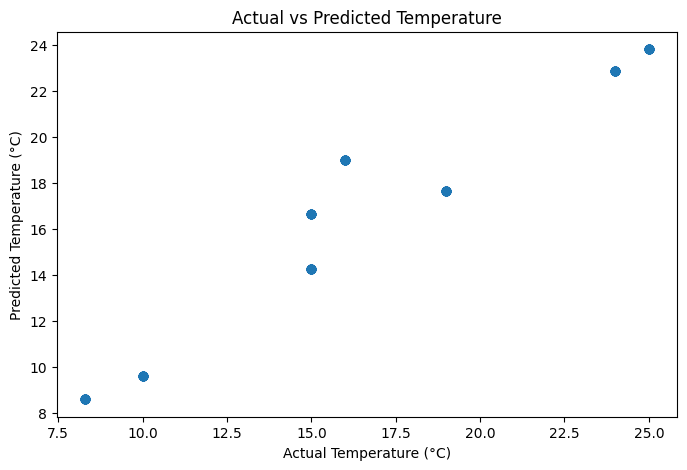

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(np.asarray(y_test).ravel(), np.asarray(y_pred).ravel())
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.show()

## Types of Linear Regression & Accuracy Comparison

#### In this section, we will compare different types of linear regression models:

#### Lasso Regression: L1 regularization (Lasso) encourages sparsity in the model by forcing some coefficients to be exactly zero, effectively selecting only a subset of features.
#### Ridge Regression: L2 regularization (Ridge) discourages large coefficients by shrinking them toward zero but usually does not force them to be exactly zero.
#### We will evaluate these models based on their Mean Squared Error (MSE) and R-squared Score(R²).

In [19]:
# Define models
models = {
    "Simple Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Store results
results= {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] ={"MSE": mse, "R2 Score": r2}

# convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)


                               MSE  R2 Score
Simple Linear Regression  1.936225  0.941366
Ridge Regression          1.937851  0.941317
Lasso Regression          2.042094  0.938160


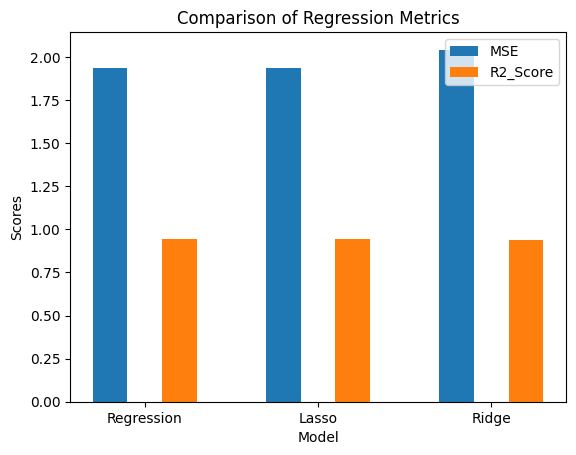

In [20]:
# plot comparison
import matplotlib.pyplot as plt
import numpy as np

mse = results_df['MSE']
r2_score = results_df['R2 Score']

positions = np.arange(len(mse))
bar_width = 0.2

plt.bar(positions - bar_width, mse, width=bar_width, label='MSE')
plt.bar(positions + bar_width, r2_score, width=bar_width, label='R2_Score')

# adding labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Metrics')

# adding the legend
plt.legend()
plt.xticks(positions, ['Regression', 'Lasso', 'Ridge'])
plt.show()